In [175]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [176]:
df = pd.read_csv("train.csv")
df.drop('Id', axis = 1, inplace = True)
print("_________________________________________________________________________________________")
print('The Shape of the dataset :',df.shape)
print("_________________________________________________________________________________________")


_________________________________________________________________________________________
The Shape of the dataset : (15120, 55)
_________________________________________________________________________________________


In [177]:
print("_________________________________________________________________________________________")
print("The Columns in the dataset are :")
print(df.columns)
print("_________________________________________________________________________________________")



_________________________________________________________________________________________
The Columns in the dataset are :
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Ty

In [178]:
print("_________________________________________________________________________________________")
print("Information about the dataset :")
print(df.info())
print("_________________________________________________________________________________________")


_________________________________________________________________________________________
Information about the dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderne

In [179]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [180]:
print("_________________________________________________________________________________________")
print("Memory Usage of the dataset :")
print(df.memory_usage())
print("_________________________________________________________________________________________")


_________________________________________________________________________________________
Memory Usage of the dataset :
Index                                    128
Elevation                             120960
Aspect                                120960
Slope                                 120960
Horizontal_Distance_To_Hydrology      120960
Vertical_Distance_To_Hydrology        120960
Horizontal_Distance_To_Roadways       120960
Hillshade_9am                         120960
Hillshade_Noon                        120960
Hillshade_3pm                         120960
Horizontal_Distance_To_Fire_Points    120960
Wilderness_Area1                      120960
Wilderness_Area2                      120960
Wilderness_Area3                      120960
Wilderness_Area4                      120960
Soil_Type1                            120960
Soil_Type2                            120960
Soil_Type3                            120960
Soil_Type4                            120960
Soil_Type5               

In [181]:
print("_________________________________________________________________________________________")
print("The first 2 rows of the dataset are :")
print(df.head(2))
print("_________________________________________________________________________________________")


_________________________________________________________________________________________
The first 2 rows of the dataset are :
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0          

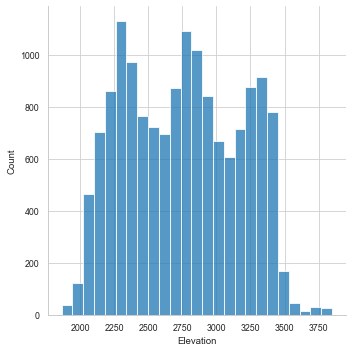

In [182]:
sns.displot(df['Elevation'], kde = False,bins = 25,palette = 'viridis')

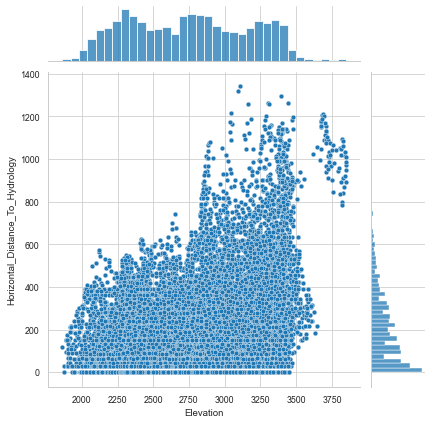

In [183]:
sns.jointplot(x = 'Elevation', y = 'Horizontal_Distance_To_Hydrology', data = df,kind='scatter')

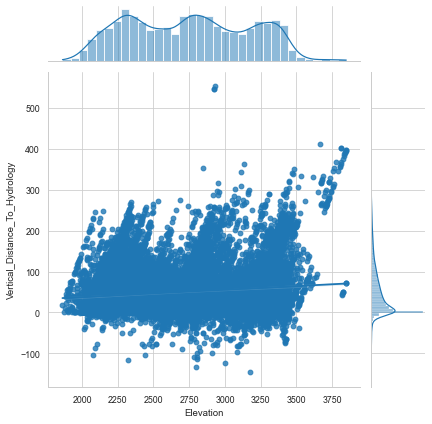

In [184]:
sns.jointplot(x = 'Elevation', y = 'Vertical_Distance_To_Hydrology', data = df,kind='reg')

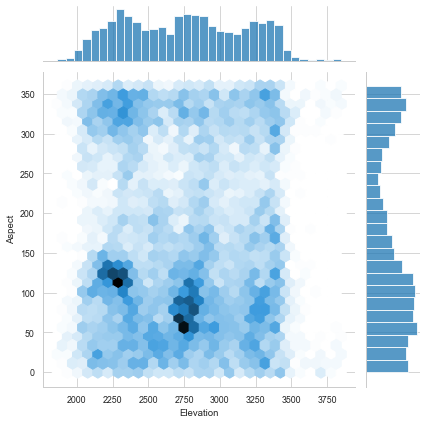

In [185]:
sns.jointplot(x = 'Elevation', y = 'Aspect', data = df,kind='hex')

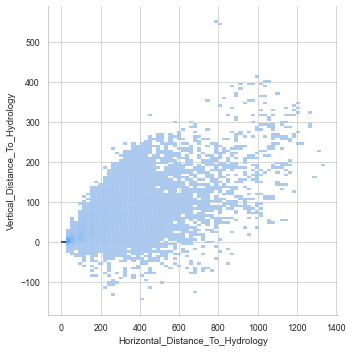

In [186]:
sns.displot(df, x="Horizontal_Distance_To_Hydrology",y="Vertical_Distance_To_Hydrology")


<AxesSubplot:xlabel='Slope', ylabel='Density'>

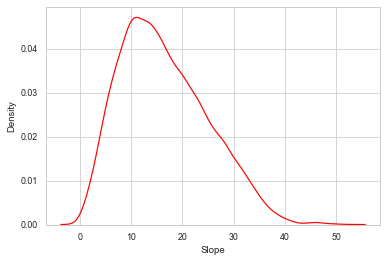

In [187]:
sns.kdeplot(df['Slope'],shade = False, color = 'red', label = 'Slope')

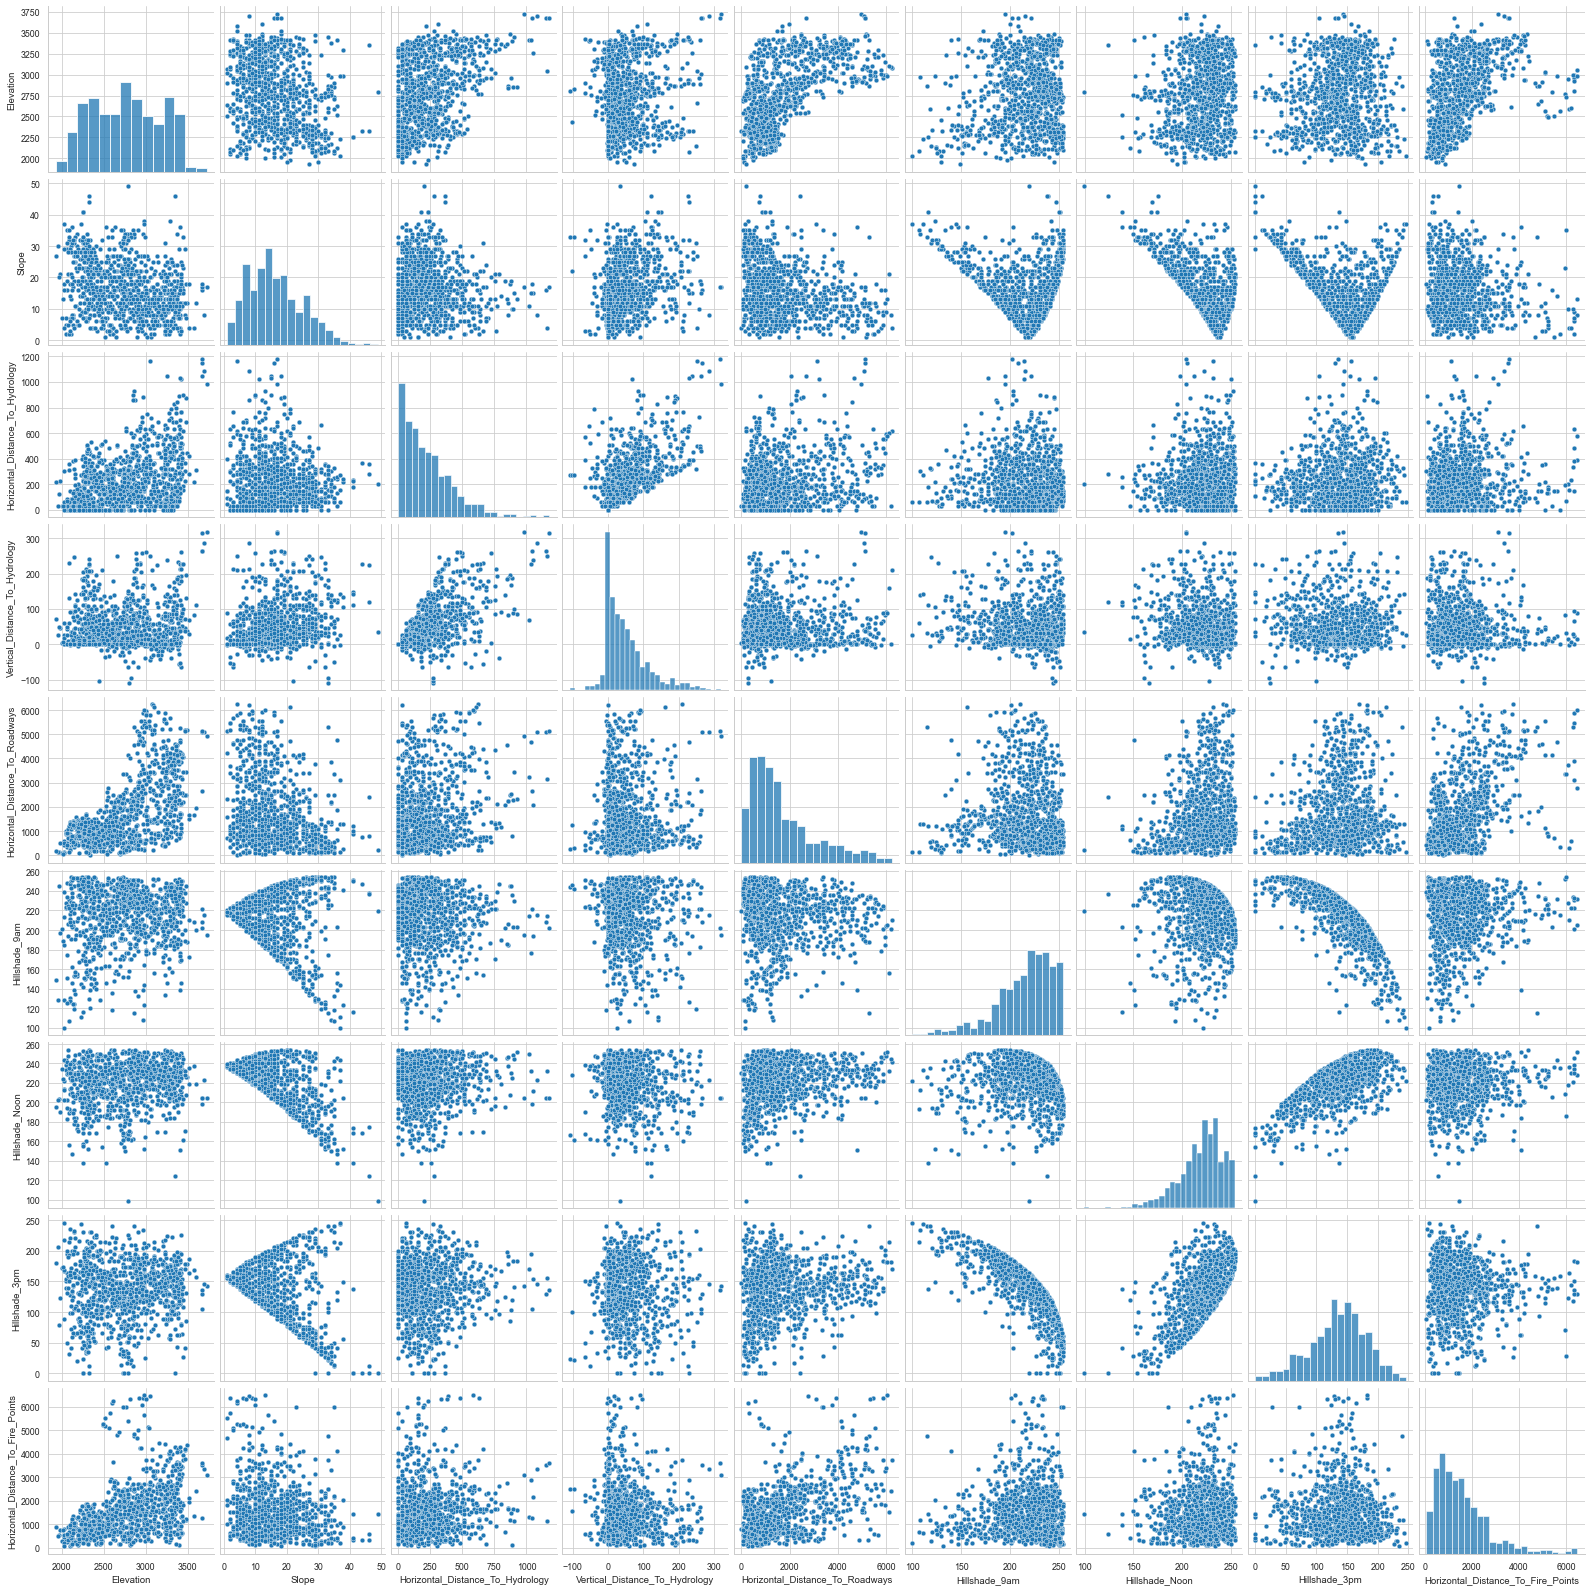

In [188]:
sample = df[['Elevation','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']].sample(1000)
sns.pairplot(sample,palette='Blues')

<AxesSubplot:xlabel='Slope'>

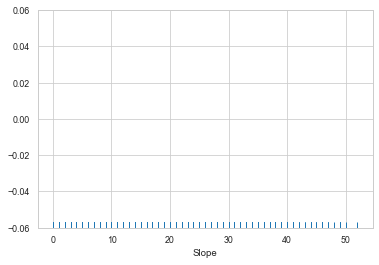

In [189]:
sns.rugplot(df['Slope'])

<Figure size 864x432 with 0 Axes>

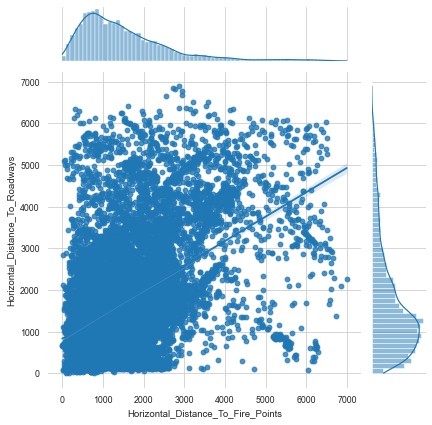

In [190]:
sns.set_style('whitegrid') #dark, white, whitegrid, darkgrid, ticks
plt.figure(figsize=(12,6))
sns.set_context('paper',font_scale=1)
sns.jointplot(x='Horizontal_Distance_To_Fire_Points',y='Horizontal_Distance_To_Roadways',data=df,kind='reg')
sns.despine(left=True,bottom=True)

<AxesSubplot:xlabel='Wilderness_Area1', ylabel='Elevation'>

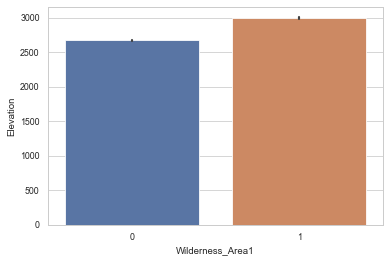

In [191]:
sns.barplot(x='Wilderness_Area1',y='Elevation',data=df,palette='deep')
# sns.barplot(x='Wilderness_Area2',y='Elevation',data=df,palette='deep')
# sns.barplot(x='Wilderness_Area3',y='Elevation',data=df,palette='deep')
# sns.barplot(x='Wilderness_Area4',y='Elevation',data=df,palette='deep')


<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

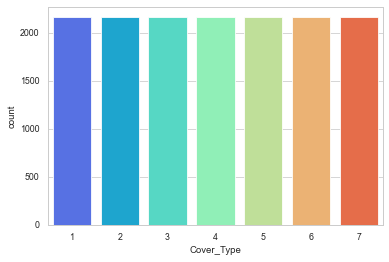

In [192]:
sns.countplot(x='Cover_Type',data=df,palette='rainbow')

<AxesSubplot:xlabel='Cover_Type', ylabel='Elevation'>

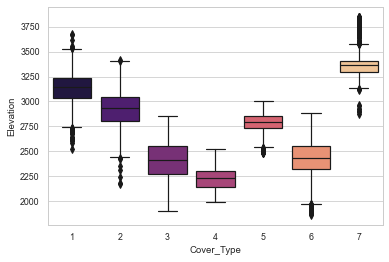

In [193]:
sns.boxplot(x='Cover_Type',y='Elevation',data=df,palette='magma')

<AxesSubplot:xlabel='Cover_Type', ylabel='Slope'>

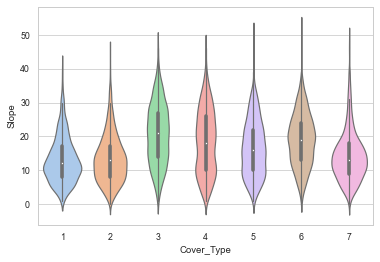

In [194]:
sns.violinplot(x='Cover_Type',y='Slope',data=df,palette='pastel',split=True)

<AxesSubplot:xlabel='Cover_Type', ylabel='Slope'>

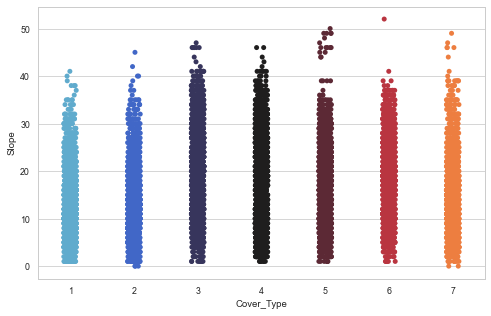

In [195]:
plt.figure(figsize=(8,5))
sns.set_context('paper',font_scale=1)
sns.set_style('whitegrid')
sns.stripplot(x='Cover_Type',y='Slope',data=df,jitter=True,palette='icefire',dodge=True)

Text(0.5, 1.05, 'Pearson Correlation of All Features')

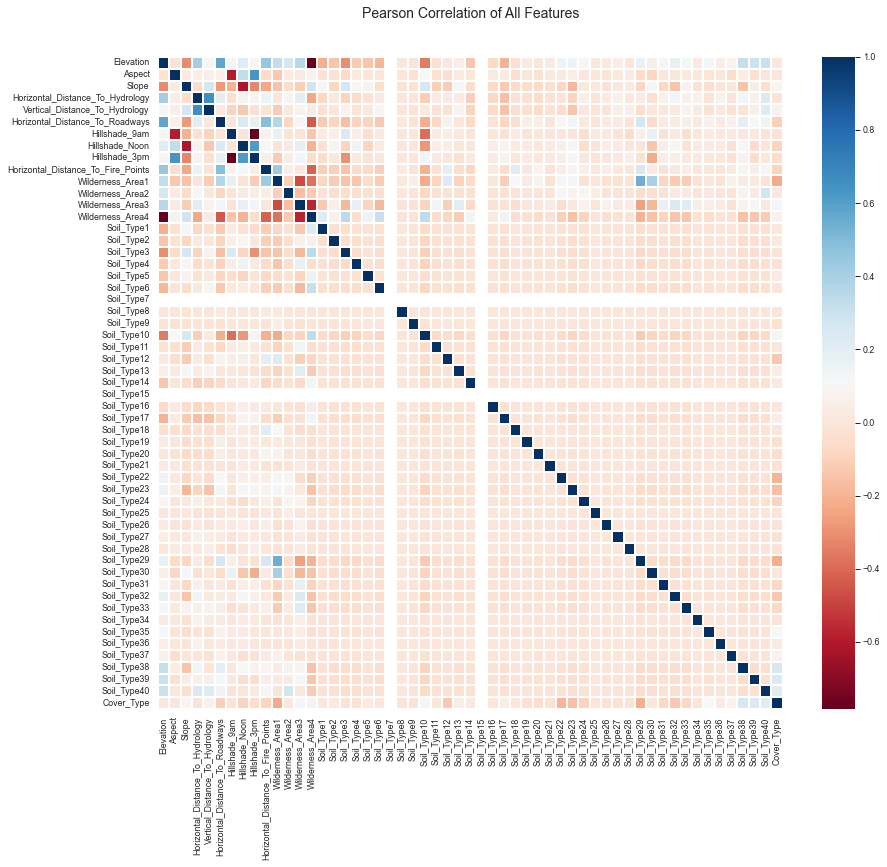

In [196]:


plt.figure(figsize=(14, 12))

colormap = plt.cm.RdBu
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0,square=False, cmap=colormap, linecolor='white', annot=False)
plt.title('Pearson Correlation of All Features', y=1.05, size=14)


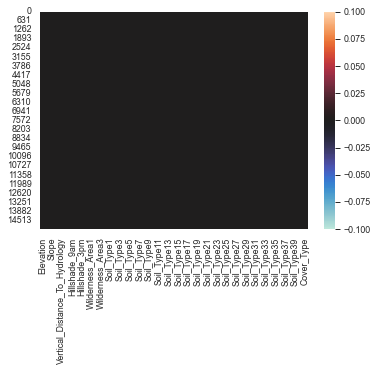

In [197]:
sns.heatmap(df.isnull(),cmap='icefire')
plt.show()


<AxesSubplot:xlabel='Cover_Type', ylabel='Wilderness_Area4'>

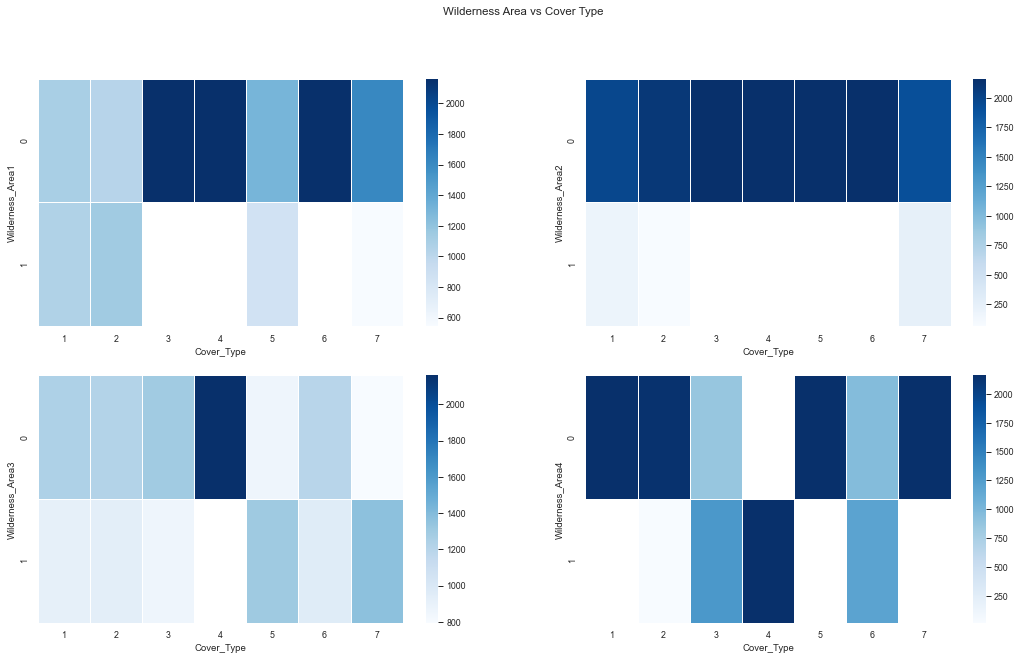

In [198]:
heat1 = df.pivot_table(index='Wilderness_Area1',columns='Cover_Type',values='Elevation',aggfunc='count')
heat2 = df.pivot_table(index='Wilderness_Area2',columns='Cover_Type', values='Elevation', aggfunc='count')
heat3 = df.pivot_table(index='Wilderness_Area3',columns='Cover_Type', values='Elevation', aggfunc='count')
heat4 = df.pivot_table(index='Wilderness_Area4',columns='Cover_Type', values='Elevation', aggfunc='count')
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Wilderness Area vs Cover Type')
sns.heatmap(heat1, cmap='Blues', linecolor='white', linewidths=1, ax=axes[0, 0])
sns.heatmap(heat3, cmap='Blues', linecolor='white', linewidths=1, ax=axes[1, 0])
sns.heatmap(heat2, cmap='Blues', linecolor='white', linewidths=1, ax=axes[0, 1])
sns.heatmap(heat4, cmap='Blues', linecolor='white', linewidths=1, ax=axes[1, 1])


<AxesSubplot:xlabel='Cover_Type', ylabel='Slope'>

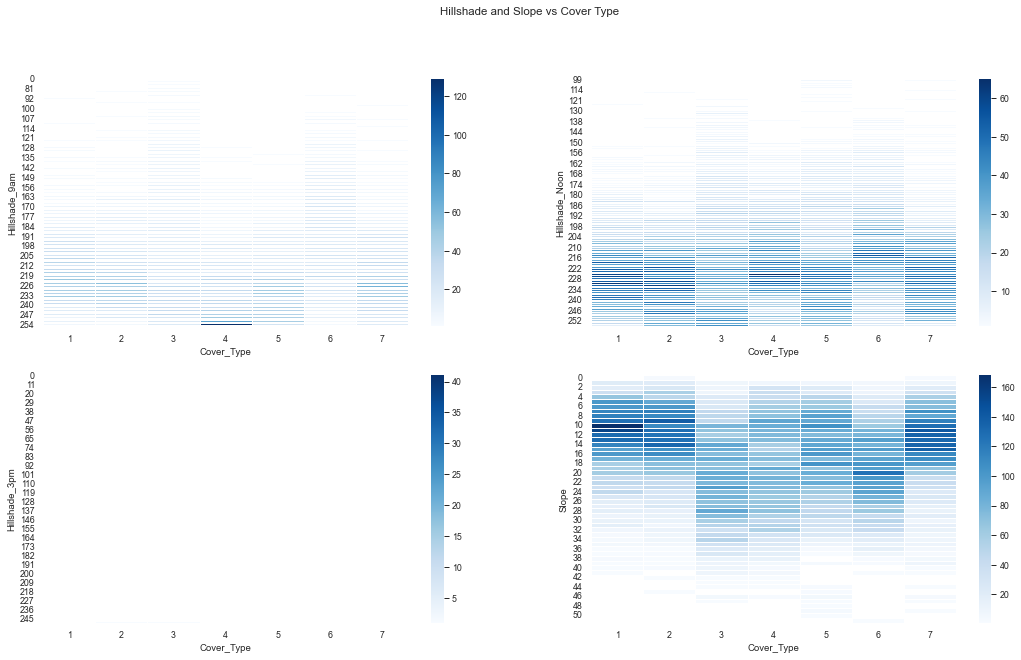

In [199]:
heat1 = df.pivot_table(index='Hillshade_9am',columns='Cover_Type',values='Elevation',aggfunc='count')
heat2 = df.pivot_table(index='Hillshade_Noon',columns='Cover_Type', values='Elevation', aggfunc='count')
heat3 = df.pivot_table(index='Hillshade_3pm',columns='Cover_Type', values='Elevation', aggfunc='count')
heat4 = df.pivot_table(index='Slope',columns='Cover_Type', values='Elevation', aggfunc='count')
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Hillshade and Slope vs Cover Type')
sns.heatmap(heat1, cmap='Blues', linecolor='white',linewidths=1, ax=axes[0, 0])
sns.heatmap(heat2, cmap='Blues', linecolor='white',linewidths=1, ax=axes[0, 1])
sns.heatmap(heat3, cmap='Blues', linecolor='white',linewidths=1, ax=axes[1, 0])
sns.heatmap(heat4, cmap='Blues', linecolor='white',linewidths=1, ax=axes[1, 1])


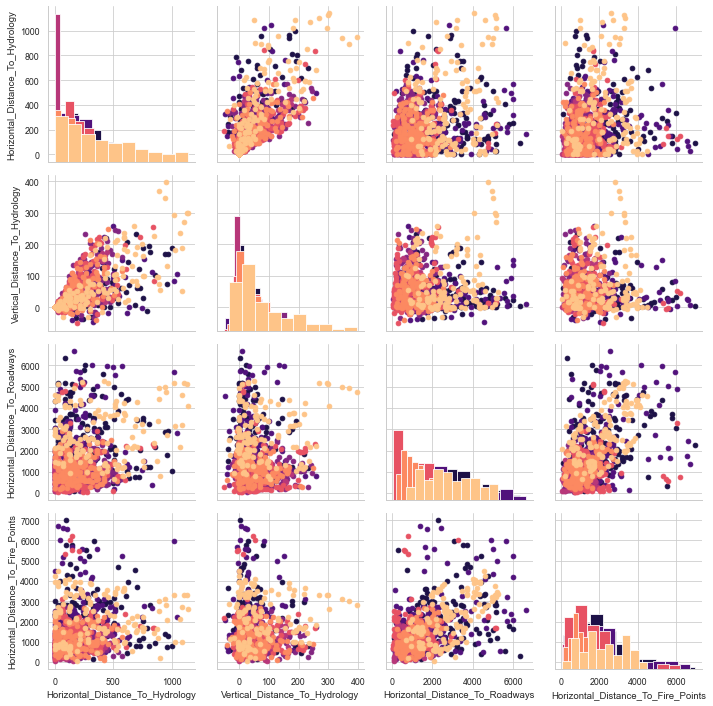

In [200]:
df2 = df[['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points','Cover_Type']].sample(1000)
g = sns.PairGrid(df2,hue='Cover_Type',palette='magma')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

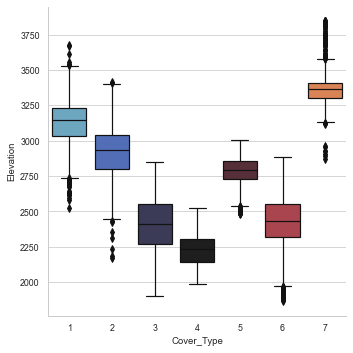

In [201]:
sns.catplot(y='Elevation',x='Cover_Type',data=df,kind='box',palette='icefire')

['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']


Text(0.5, 1.0, 'Density of Cover Types Among Different Wilderness Areas')

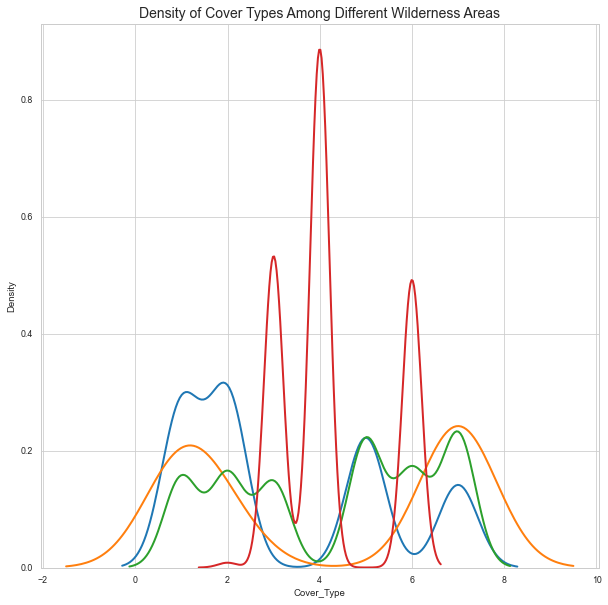

In [202]:

df['Wilderness_Area_Type'] = (df.iloc[:, 10:15] == 1).idxmax(1)

wilderness_areas = sorted(df['Wilderness_Area_Type'].value_counts().index.tolist())
print(wilderness_areas)
plt.figure(figsize=(10, 10))

for area in wilderness_areas:
    subset = df[df['Wilderness_Area_Type'] == area]
    sns.kdeplot(subset["Cover_Type"], label=area, linewidth=2)


plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.title("Density of Cover Types Among Different Wilderness Areas", size=14)


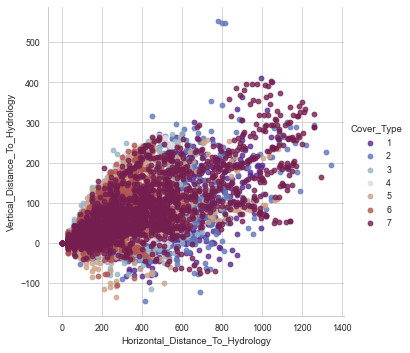

In [203]:
sns.lmplot(x='Horizontal_Distance_To_Hydrology',y='Vertical_Distance_To_Hydrology',data=df,hue='Cover_Type',palette='twilight_shifted',fit_reg=False)

In [204]:
corr = df.corr()
print(corr['Cover_Type'].sort_values(ascending=False)[:10], '\n')

Cover_Type                        1.000000
Soil_Type38                       0.257810
Soil_Type39                       0.240384
Soil_Type40                       0.205851
Soil_Type10                       0.128972
Wilderness_Area3                  0.122146
Soil_Type35                       0.114327
Slope                             0.087722
Wilderness_Area4                  0.075774
Vertical_Distance_To_Hydrology    0.075647
Name: Cover_Type, dtype: float64 



In [205]:
def split_numbers_chars(row):
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

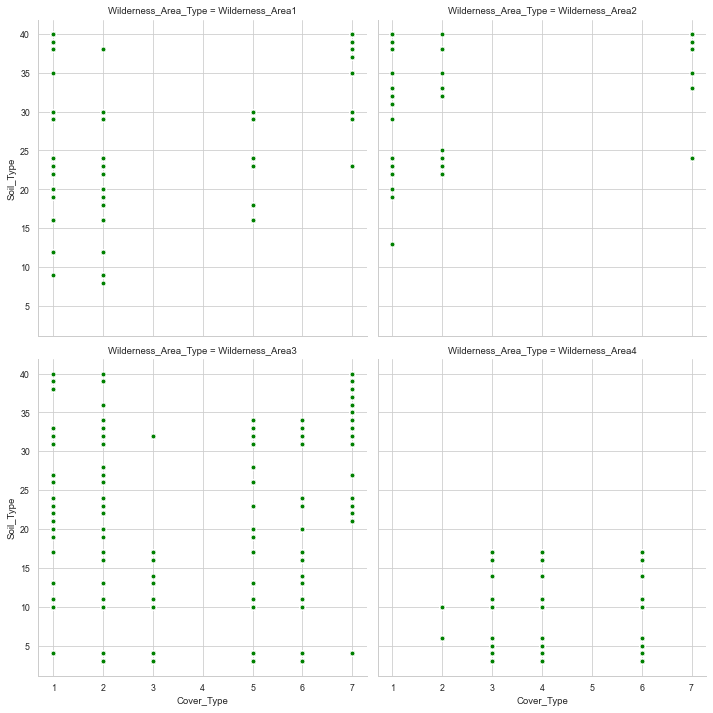

In [206]:
reverse_one_hot_encode(df, 16, 56, "Soil_Type")
g = sns.FacetGrid(df, col="Wilderness_Area_Type",col_wrap=2, height=5, col_order=wilderness_areas)
g = g.map(plt.scatter, "Cover_Type", "Soil_Type", edgecolor="w", color="g")


Text(0.5, 1.0, 'Pearson Correlation of Features with Numeric Soil_Type')

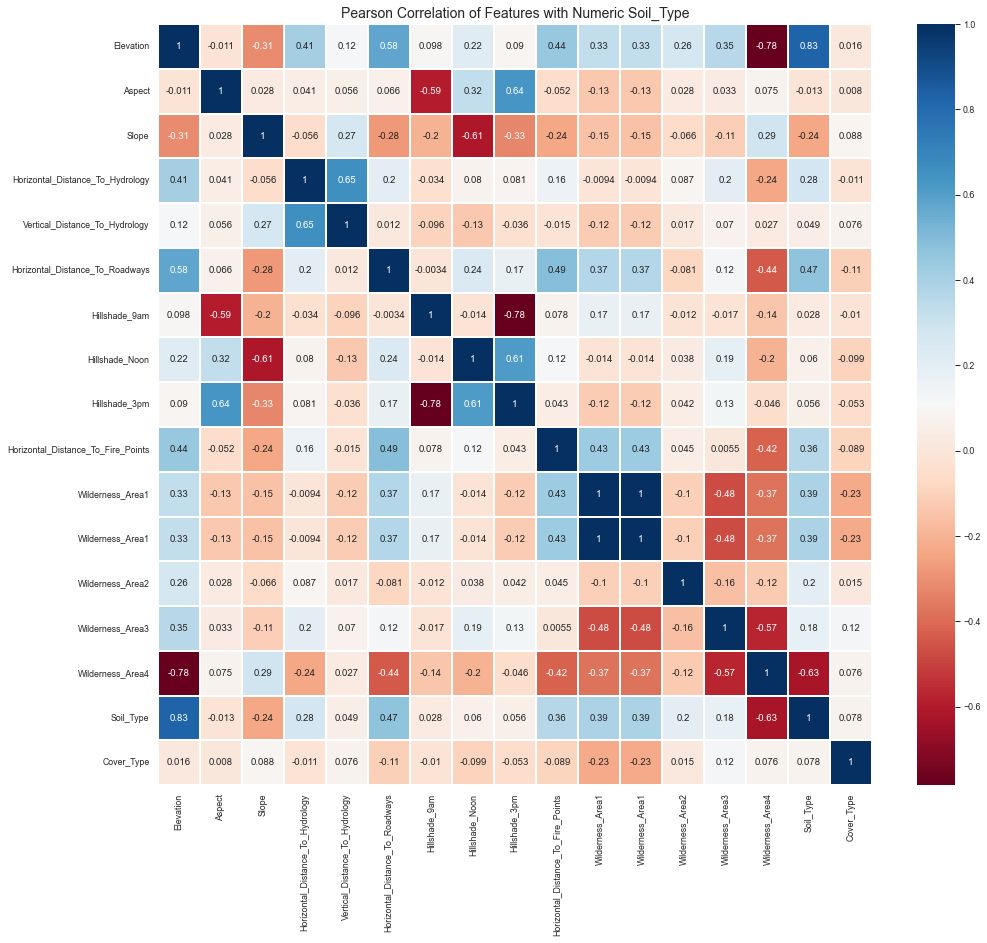

In [207]:
continuous_variables = df.columns[0:11].tolist()
all_features_w_label = continuous_variables + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
trees_w_numeric_soil = df[all_features_w_label]

correlations = pd.DataFrame(trees_w_numeric_soil.corr())

plt.figure(figsize = (16, 14))

colormap = plt.cm.RdBu
sns.heatmap(correlations, linewidths=0.1,
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Features with Numeric Soil_Type', size=14)


In [208]:
def outlier_function(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (3 * iqr)
    upper_bound = q3 + (3* iqr)
    outlier_count = 0
    for i in df[col_name]:
        if i < lower_bound or i > upper_bound:
            outlier_count += 1
    return lower_bound, upper_bound,outlier_count



In [209]:
for column in df.columns.drop(['Wilderness_Area_Type']):
    if outlier_function(df, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(df, column)[2], column))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points
There are 3597 outliers in Wilderness_Area1
There are 499 outliers in Wilderness_Area2
There are 355 outliers in Soil_Type1
There are 623 outliers in Soil_Type2
There are 962 outliers in Soil_Type3
There are 843 outliers in Soil_Type4
There are 165 outliers in Soil_Type5
There are 650 outliers in Soil_Type6
There are 1 outliers in Soil_Type8
There are 10 outliers in Soil_Type9
There are 2142 outliers in Soil_Type10
There are 406 outliers in Soil_Type11
There are 227 outliers in Soil_Type12
There are 476 outliers in Soil_Type13
There are 169 outliers in Soil_Type14
There are 114 outliers in Soil_Type16
There are 612 outliers in Soil_Type17
There are 60 outliers in Soil_Type18
There a

In [210]:
trees_w_numeric_soil['Euclidian_Distance_To_Hydrology'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology']**2 + trees_w_numeric_soil['Vertical_Distance_To_Hydrology']**2)**0.5
trees_w_numeric_soil.describe()

C:\Users\prana\AppData\Local\Temp\ipykernel_1680\4185642047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_w_numeric_soil['Euclidian_Distance_To_Hydrology'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology']**2 + trees_w_numeric_soil['Vertical_Distance_To_Hydrology']**2)**0.5


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type,Cover_Type,Euclidian_Distance_To_Hydrology
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.237897,0.033003,0.419907,0.309193,19.259524,4.000000,235.948778
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.425810,0.178649,0.493560,0.462176,12.507823,2.000066,215.491695
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2.000000,67.186308
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,4.000000,188.480768
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,0.000000,0.000000,0.000000,1.000000,1.000000,30.000000,6.000000,342.069071
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000,7.000000,1356.939571


In [211]:
trees_w_numeric_soil['Mean_Elevation_Vertical_Distance_Hydrology'] = (df['Elevation'] + trees_w_numeric_soil['Vertical_Distance_To_Hydrology'])/2
trees_w_numeric_soil['Mean_Distance_Hydrology_Firepoints'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + trees_w_numeric_soil['Horizontal_Distance_To_Fire_Points'])/2
trees_w_numeric_soil['Mean_Distance_Hydrology_Roadways'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + trees_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2
trees_w_numeric_soil['Mean_Distance_Firepoints_Roadways'] = (trees_w_numeric_soil['Horizontal_Distance_To_Fire_Points'] + trees_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2


C:\Users\prana\AppData\Local\Temp\ipykernel_1680\1241493361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_w_numeric_soil['Mean_Elevation_Vertical_Distance_Hydrology'] = (df['Elevation'] + trees_w_numeric_soil['Vertical_Distance_To_Hydrology'])/2
C:\Users\prana\AppData\Local\Temp\ipykernel_1680\1241493361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_w_numeric_soil['Mean_Distance_Hydrology_Firepoints'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + trees_w_numeric_soil[

In [212]:
for col in trees_w_numeric_soil.columns:
    if trees_w_numeric_soil[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
            trees_w_numeric_soil['sqrt' +col] = np.sqrt(trees_w_numeric_soil[col])


C:\Users\prana\AppData\Local\Temp\ipykernel_1680\86342751.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_w_numeric_soil['sqrt' +col] = np.sqrt(trees_w_numeric_soil[col])
C:\Users\prana\AppData\Local\Temp\ipykernel_1680\86342751.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_w_numeric_soil['sqrt' +col] = np.sqrt(trees_w_numeric_soil[col])
C:\Users\prana\AppData\Local\Temp\ipykernel_1680\86342751.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
correlations_transformed = pd.DataFrame(trees_w_numeric_soil.corr(method='pearson'))
correlations_transformed = pd.DataFrame(correlations_transformed["Cover_Type"]).reset_index()
correlations_transformed.columns = ["Feature", "Correlation with Cover_Type"]
correlations_transformed = (correlations_transformed[correlations_transformed["Feature"] != "Cover_Type"].sort_values(by="Correlation with Cover_Type", ascending=True))
display(correlations_transformed)



,Feature,Correlation with Cover_Type
30,sqrtWilderness_Area1,-0.230117
10,Wilderness_Area1,-0.230117
20,Mean_Distance_Firepoints_Roadways,-0.113834
39,sqrtMean_Distance_Firepoints_Roadways,-0.107488
5,Horizontal_Distance_To_Roadways,-0.105662
19,Mean_Distance_Hydrology_Roadways,-0.102820
7,Hillshade_Noon,-0.098905
27,sqrtHillshade_Noon,-0.098473
38,sqrtMean_Distance_Hydrology_Roadways,-0.090889
9,Horizontal_Distance_To_Fire_Points,-0.089389


In [ ]:
transformed_features = ['sqrtHorizontal_Distance_To_Hydrology', 'sqrtMean_Distance_Hydrology_Roadways', 'sqrtEuclidian_Distance_To_Hydrology',
                        'Mean_Elevation_Vertical_Distance_Hydrology', 'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Firepoints', ]

all_features = (['Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways','Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'] + wilderness_areas + ['Soil_Type'] + transformed_features)
print(len(all_features))
print(len(wilderness_areas))
trees_training = trees_w_numeric_soil[all_features]
labels_training = trees_w_numeric_soil["Cover_Type"].to_numpy()


18
3


In [ ]:
X_Train,X_Valid,Y_Train,Y_Valid = train_test_split(trees_training,labels_training,test_size=0.2,random_state=1)
print('Training Data Shape:', X_Train.shape)
print('Validation Data Shape:', X_Valid.shape)
print('Training Label Shape:', Y_Train.shape)
print('Validation Label Shape:', Y_Valid.shape)


Training Data Shape: (12096, 18)
Validation Data Shape: (3024, 18)
Training Label Shape: (12096,)
Validation Label Shape: (3024,)
